## Mujoco

In [1]:
import random
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
import gym
import numpy as np
import ddpg_agent
from ddpg_agent import Agent

Current device is: cuda:0
The GPU model is:  NVIDIA GeForce RTX 3070 Ti


In [2]:
envName = 'InvertedDoublePendulum-v2'
env = gym.make(envName)
env.reset(seed=0)
stateDim = env.observation_space.shape[0]
actionDim = env.action_space.shape[0]
print('The dimension of the state space is: ', stateDim)
print('The dimension of the action space is: ', actionDim)

/home/jerry/anaconda3/envs/mujoco_py/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The dimension of the state space is:  11
The dimension of the action space is:  1


In [3]:
agents = Agent(state_size=stateDim, action_size=actionDim, random_seed=0, num_agents = 1) # instantiate the agent

In [4]:
n_episodes = 20000
max_t = 1000
print_every = 100

scores_deque = deque(maxlen=print_every)
scores = []
last_mean_score = 30
plot_score = []
mark = []

In [ ]:
for i_episode in range(1, n_episodes+1):
    states = env.reset()
#     states = env_info.vector_observations
    
    agents.reset() # set the noise to zero
    score = 0
    for t in range(max_t):
        
#         print(len(states))
        actionRaw = agents.act(states) 
#         print(np.squeeze(actions, axis=0))
        actions = np.squeeze(actionRaw, axis=0)

        next_states, rewards, dones, _ = env.step(actions)
                           

        agents.step(states, actionRaw, rewards, next_states, dones)

        states = next_states
        score += rewards
        if np.any(dones):
            break 
    scores_deque.append(np.mean(score))
    scores.append(np.mean(score))
    print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)), end="")
    if i_episode % print_every == 0:
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
        plot_score.append(np.mean(scores_deque))
        mark.append(i_episode)
    if len(scores_deque) == print_every:
        mean_score = np.mean(scores_deque)
        if mean_score > last_mean_score:
            torch.save(agents.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agents.critic_local.state_dict(), 'checkpoint_critic.pth')
            last_mean_score = mean_score



/home/jerry/anaconda3/envs/mujoco_py/lib/python3.8/site-packages/torch/nn/functional.py:1933: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 100	Average Score: 42.23
Episode 200	Average Score: 30.83
Episode 300	Average Score: 31.52
Episode 400	Average Score: 31.73
Episode 500	Average Score: 31.54
Episode 600	Average Score: 64.36
Episode 700	Average Score: 75.76
Episode 800	Average Score: 74.18
Episode 900	Average Score: 85.86
Episode 1000	Average Score: 93.72
Episode 1100	Average Score: 94.68
Episode 1200	Average Score: 90.46
Episode 1300	Average Score: 85.34
Episode 1400	Average Score: 90.12
Episode 1500	Average Score: 94.06
Episode 1600	Average Score: 102.36
Episode 1700	Average Score: 111.07
Episode 1800	Average Score: 124.58
Episode 1900	Average Score: 114.04
Episode 2000	Average Score: 115.29
Episode 2100	Average Score: 113.41
Episode 2200	Average Score: 111.62
Episode 2300	Average Score: 107.41
Episode 2400	Average Score: 109.16
Episode 2500	Average Score: 115.58
Episode 2600	Average Score: 112.82
Episode 2700	Average Score: 111.18
Episode 2800	Average Score: 117.29
Episode 2900	Average Score: 127.99
Episode 3

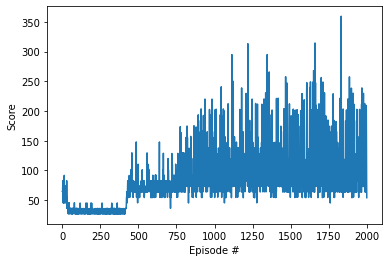

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 5. Replay the trained agent
By using the trained actor and critic network, we can replay the agent

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import random
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
import ddpg_agent
from ddpg_agent import Agent

Current device is: cuda:0
The GPU model is:  NVIDIA GeForce RTX 2060 SUPER


In [3]:
env = UnityEnvironment(file_name='Reacher_Linux_single/Reacher_Linux/Reacher.x86_64')
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


In [6]:
agents = Agent(state_size=state_size, action_size=action_size, random_seed=0, num_agents = num_agents) # instantiate the agent

In [7]:
# load the weights from file
agents.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agents.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

for i in range(10):
    env_info = env.reset(train_mode=False)[brain_name]
    state = env_info.vector_observations
    for j in range(200):
        action = agents.act(state)
        env_info = env.step(action)[brain_name]
        state = env_info.vector_observations
        reward = env_info.rewards
        done = env_info.local_done
        if np.any(done):
            break 
            
env.close()

/home/jerry/anaconda3/envs/drlnd/lib/python3.6/site-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [3]:
import numpy as np
import random
x = 5
a = np.array([random.random() for i in range(5)])
b = np.random.normal(0, 1, 5)

In [4]:
print(a)

[0.18906067 0.1681117  0.76342685 0.20684127 0.23792938]


In [5]:
print(b)

[-1.04171779 -0.39351587  1.38651289  0.62953946  0.3932983 ]
